<a href="https://colab.research.google.com/github/tanay47/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

###Let's get straight to our analysis. We'll start by importing all must libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Mount on colab for data importing.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load and store dataset to a varible.
seo_bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone Project LR/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
seo_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


###Our data is mounted and ready to be operated. Let's check basic information of our dataset first.

In [5]:
seo_bike_df.size

122640

In [6]:
seo_bike_df.shape

(8760, 14)

In [7]:
seo_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###So, we have total of "8760" observations and "14" columns. Also, we have "0" null values throughout our dataset. Though its highly unlikely to come across such datasets, here it works in our favour. Surprising right?

In [8]:
seo_bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


###Here we have a genaral overview of numerical features and we can already make rough estimations over it. Like,

*   Our target variable appears to have slight skwness.
*   Main factors affecting could be "hour of the day", "Rainfall", "Temperature" etc.
*   Median of each columns.
*   Differnt quartiles.
###We'll check if that's true later using EDA.





In [9]:
# check for duplicated observations.
len(seo_bike_df[seo_bike_df.duplicated()])

0

###Great, we do not have any duplicate observations as well, let's change variable names to their approprite names.

In [10]:
# Re-naming colummns.
seo_bike_df.columns=['Date','Rent Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind velocity', 'Visibility', 'Dew.P Temp',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning Day']

In [11]:
#Convert the Date column in Datetime Dtype
seo_bike_df['Date']=pd.to_datetime(seo_bike_df['Date'])

In [12]:
seo_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Rent Bike Count  8760 non-null   int64         
 2   Hour             8760 non-null   int64         
 3   Temperature      8760 non-null   float64       
 4   Humidity         8760 non-null   int64         
 5   Wind velocity    8760 non-null   float64       
 6   Visibility       8760 non-null   int64         
 7   Dew.P Temp       8760 non-null   float64       
 8   Solar Radiation  8760 non-null   float64       
 9   Rainfall         8760 non-null   float64       
 10  Snowfall         8760 non-null   float64       
 11  Seasons          8760 non-null   object        
 12  Holiday          8760 non-null   object        
 13  Functioning Day  8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

###This concludes basic overview on this dataset. Now, We will analyse this dataset in detail and prepare it throughly to pass it on to different models as required.

# Exploratory Data Analysis.

###Starting EDA with univariate analysis. Checks will be performed for distribution, skewness, outliers.
###For convince we will define two variable with "dependent" and "independent" variables to list.

In [13]:
# List of dependent, independent variables.
all_columns = seo_bike_df.columns.tolist()
independent_var = list(set(all_columns) - {"Rented Bike Count"})
dependent_var = all_columns[1]
dependent_var

'Rent Bike Count'

In [14]:
# Setting fifure size.
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [15]:
# Removing all negetive and positive infinity values.
seo_bike_df.replace([np.inf, -np.inf], 0, inplace=True)

###Outlier treatment on numerical variable.

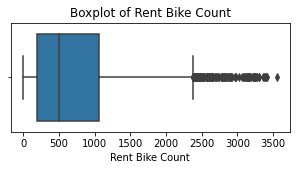

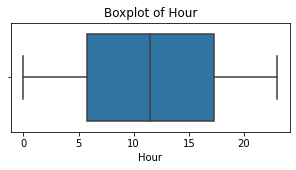

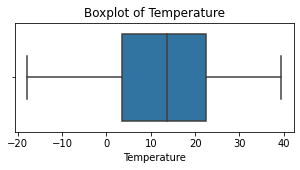

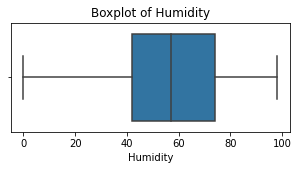

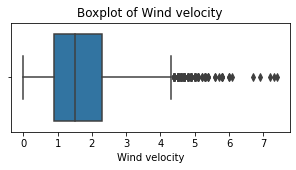

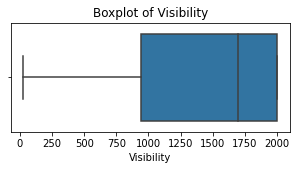

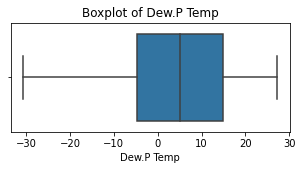

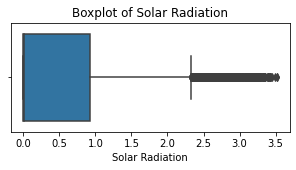

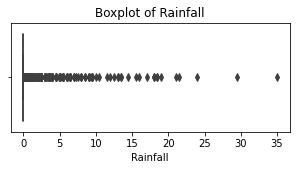

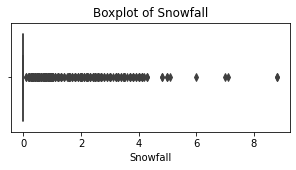

In [16]:
# Boxplot of every numerical varibles.
for var in seo_bike_df.describe().columns.tolist():
  plt.figure(figsize=(5,2))
  sns.boxplot(seo_bike_df[var])
  plt.title(f"Boxplot of {var}")
  plt.tight_layout

###We can clearly see that some variables have a lot of outliers. And we are going to treat them.

In [17]:
seo_bike_df.describe().columns.tolist()

['Rent Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind velocity',
 'Visibility',
 'Dew.P Temp',
 'Solar Radiation',
 'Rainfall',
 'Snowfall']

In [18]:
# Flooring and capping of outliers.
for var in list(set(seo_bike_df.describe().columns.tolist()) - {"Rainfall", "Snowfall"}):
  q1 = np.quantile(seo_bike_df[var], 0.25)
  q3 = np.quantile(seo_bike_df[var], 0.75)
  iqr = q3 - q1
  lower_limit = q1 - (1.5*iqr)
  upper_limit = q3 + (1.5*iqr)
  seo_bike_df[var] = np.where( seo_bike_df[var] > upper_limit, seo_bike_df[var].median(), seo_bike_df[var] )
  seo_bike_df[var] = np.where( seo_bike_df[var] < lower_limit, seo_bike_df[var].median(), seo_bike_df[var] )

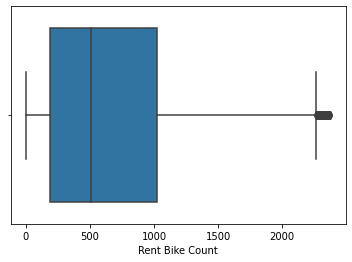

In [19]:
sns.boxplot(seo_bike_df[dependent_var])

###Great, we compressed outliers within acceptable range.

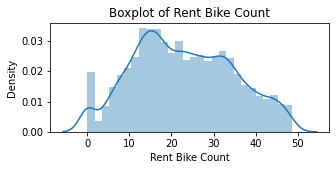

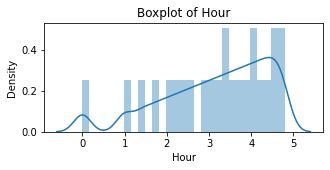

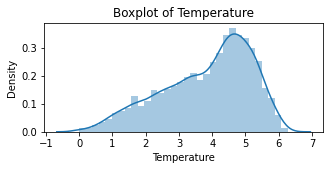

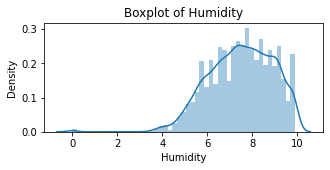

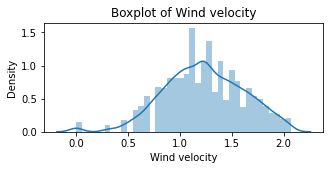

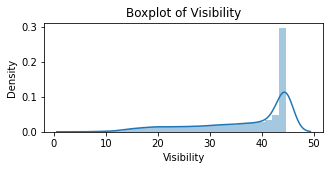

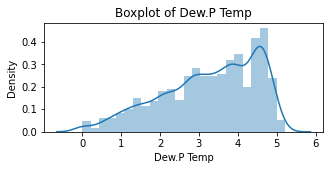

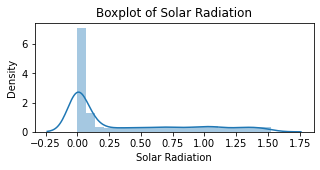

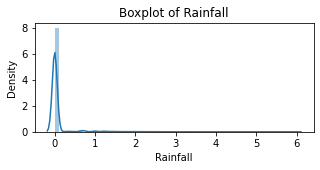

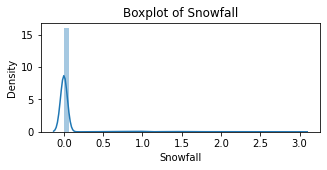

In [20]:
# Check for which transformation to use later.
for var in seo_bike_df.describe().columns.tolist():
  plt.figure(figsize=(5,2))
  sns.distplot(np.sqrt(seo_bike_df[var]))
  plt.title(f"Boxplot of {var}")

###We are going to use "squareroot" transformation for this analsis, as it best approximates to gaussion distributin for this dataset.

##Multivariate analysis.

###Checking for linear relationship between dependent and independent variables.

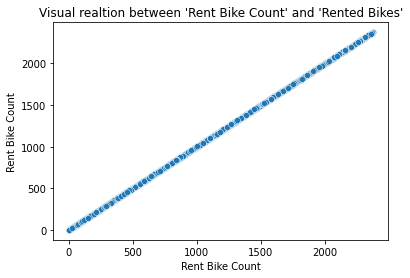

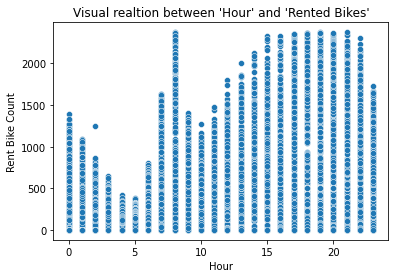

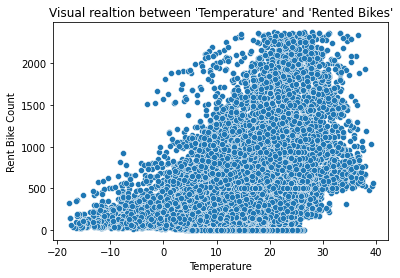

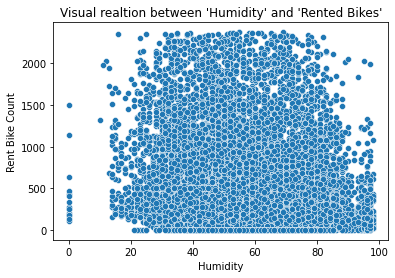

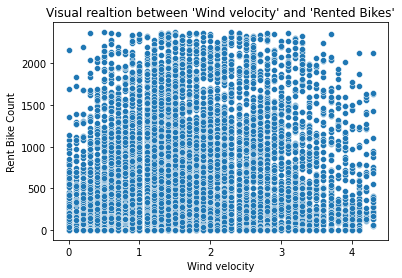

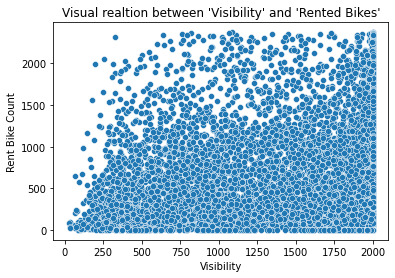

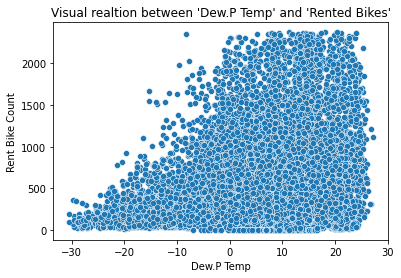

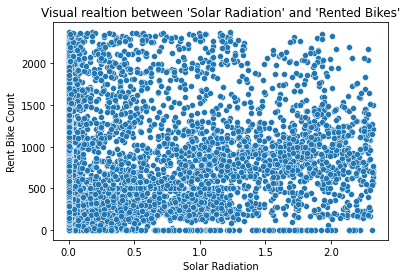

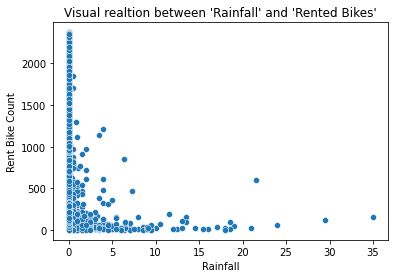

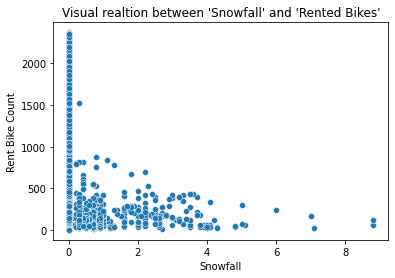

In [21]:
# Plotting scatterplot of independent variable to dependent variable.
for var in list(seo_bike_df.describe().columns):
 sns.scatterplot( seo_bike_df[var], seo_bike_df["Rent Bike Count"])
 plt.title(f"Visual realtion between '{var}' and 'Rented Bikes'")
 plt.show()

###Here we observe that, there ain't enough linear relaion between dependent and independent variables.
###We'll have to try few models and test them.
###Initial guess here is " Random forest will work better than linear regression "

###Let's also have a look at corealtion between independent variables. Calculate "VIF"

In [22]:
# Multicollinearity detection.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(seo_bike_df[[i for i in seo_bike_df.describe().columns if i not in ['Rent Bike Count']]])

,variables,VIF
0,Hour,4.334061
1,Temperature,25.195230
2,Humidity,5.282791
3,Wind velocity,5.016426
4,Visibility,8.619840
5,Dew.P Temp,14.473073
6,Solar Radiation,1.723752
7,Rainfall,1.081041
8,Snowfall,1.113852


###Here we can clearly see "Temperature" and "Dew.P Temperature" have a little high "VIF".

###Let's have a look at barplot with respect to time. 

In [23]:
# First we will introduce new columns as "Day", "Month" and "Year".
seo_bike_df['Day']=seo_bike_df['Date'].dt.day
seo_bike_df['Month']=seo_bike_df['Date'].dt.month
seo_bike_df['Year']=seo_bike_df['Date'].dt.year
seo_bike_df.drop( ["Date"], axis=1, inplace=True )

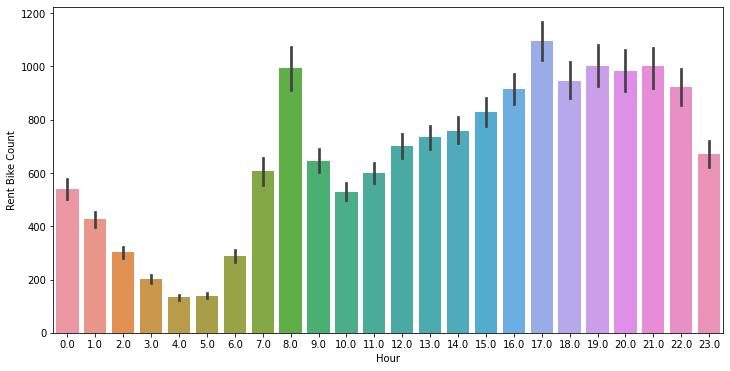

In [24]:
# plotting barplots.
plt.figure(figsize=(12,6))
sns.barplot(seo_bike_df["Hour"], seo_bike_df[dependent_var])

###As we can see above, Bikes are mostly rented on "8:00 AM" and "5:00 PM" to "10:00 PM".

In [25]:
seo_bike_df.head()

,Rent Bike Count,Hour,Temperature,Humidity,Wind velocity,Visibility,Dew.P Temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [26]:
# Unique season types.
seo_bike_df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Text(0.5, 1.0, "Barplot of 'Rent BIke Count' to 'Seasons'")

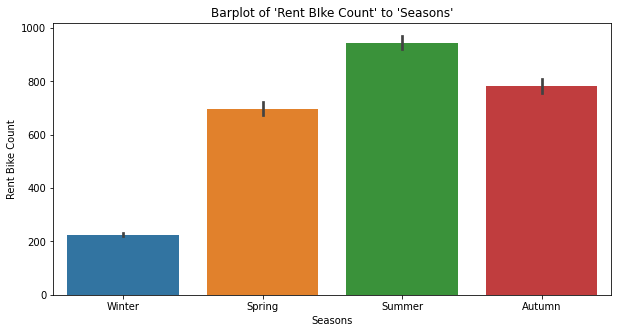

In [27]:
# Barplot of categorical variables with dependent variable.
plt.figure(figsize=(10,5))
sns.barplot(seo_bike_df["Seasons"], seo_bike_df[dependent_var])
plt.title(f"Barplot of 'Rent BIke Count' to 'Seasons'")

Minimum Temperature listed was -17.8
Maximum Temperature listed was 39.4


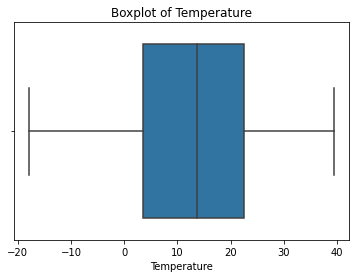

In [28]:
# Checking minimun and maximum "Temperature".
sns.boxplot(x = seo_bike_df["Temperature"])
plt.title(f"Boxplot of Temperature")
min_temp =  min(seo_bike_df["Temperature"])
max_temp =  max(seo_bike_df["Temperature"])
print(f"Minimum Temperature listed was {min_temp}")
print(f"Maximum Temperature listed was {max_temp}")

###People mostly rent bikes on "Spring", "Summer" and "Autumn" as temperature is favourable during this range.
###As in winters temperature drops down to "-17 degree Celcius". 

In [29]:
seo_bike_df.head()

,Rent Bike Count,Hour,Temperature,Humidity,Wind velocity,Visibility,Dew.P Temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [30]:
seo_bike_df.head()

,Rent Bike Count,Hour,Temperature,Humidity,Wind velocity,Visibility,Dew.P Temp,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


###Let's categorise few variables for generalized prediction.

In [31]:
# Categorizing variables.("Solar Radiation", "Rainfall", "Snowfall")
var_to_cat_list = ["Solar Radiation", "Rainfall", "Snowfall"]
for var in var_to_cat_list:
  seo_bike_df[var] = seo_bike_df[var].apply(lambda x: 1 if x >= (seo_bike_df[var].mean()) else 0)

# Categorizing variables.("Holiday", "Functioning Day")
seo_bike_df['Holiday'] = seo_bike_df['Holiday'].map({'No Holiday':0,'Holiday':1})
seo_bike_df['Functioning Day'] = seo_bike_df['Functioning Day'].map({'No':0,'Yes':1})

# Using one hot encoding on "Seasons".
seo_bike_df = pd.get_dummies(seo_bike_df)

In [32]:
seo_bike_df.head()

,Rent Bike Count,Hour,Temperature,Humidity,Wind velocity,Visibility,Dew.P Temp,Solar Radiation,Rainfall,Snowfall,Holiday,Functioning Day,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0,0,0,0,1,12,1,2017,0,0,0,1
1,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0,0,0,0,1,12,1,2017,0,0,0,1
2,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0,0,0,0,1,12,1,2017,0,0,0,1
3,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0,0,0,0,1,12,1,2017,0,0,0,1
4,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0,0,0,0,1,12,1,2017,0,0,0,1


###Now we are almost ready to pass our data to regressor.

In [33]:
# Dividing Dataset into "dependent"==> y  and "independent"==> x.
x=seo_bike_df.drop('Rent Bike Count',axis=1)
y=seo_bike_df['Rent Bike Count']

##Implementing Linear Regressor.

###we will use Cross-Validation for every regressor we will be implimenting. And, insted of normal Linear Regression, we'll be using Regularised Regression.

In [34]:
# Train-Test split.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [35]:
# implimenting LASSO REGRESSION.
lasso= Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [36]:
# Best Lasso parameter and R-Sq score.
lasso_train_pred = lasso_reg.predict(x_train)
lasso_test_pred = lasso_reg.predict(x_test)

rsq_train_lasso = r2_score( y_train, lasso_train_pred)
rsq_test_lasso = r2_score( y_test, lasso_test_pred)

print(f"Best Alfa here was: {lasso_reg.best_params_}")
print(f"Train R-sq for lasso regressor is: {rsq_train_lasso}")
print(f"Test R-sq for lasso regressor is: {rsq_test_lasso}")

Best Alfa here was: {'alpha': 0.01}
Train R-sq for lasso regressor is: 0.5530310884242241
Test R-sq for lasso regressor is: 0.544639914465562


###As we guessed earlier, Linear Regression won't fit very well to data like this one. 
###Even though variance is very low between them we cannot consider this as a best fit model.
###Also there is no point in trying other LINEAR type regressor.

##Implementing Desicion Tree Regressor.

In [46]:
# Implimenting Desicion Tree.
d_tree= DecisionTreeRegressor()
d_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [47]:
# R-Sq score.
dtree_train_pred = d_tree.predict(x_train)
dtree_test_pred = d_tree.predict(x_test)

rsq_train_dtree = r2_score( y_train, dtree_train_pred)
rsq_test_dtree = r2_score( y_test, dtree_test_pred)

print(f"Train R-sq for lasso regressor is: {rsq_train_dtree}")
print(f"Test R-sq for lasso regressor is: {rsq_test_dtree}")

Train R-sq for lasso regressor is: 1.0
Test R-sq for lasso regressor is: 0.5894145969813902


###Decision Tree model has claerly overfitted the data way too much.

##Ensemble - Random Forest Regressior.

###One of many ways to manage overfitting in D-Tree models is to use Ensemble techniques.

In [48]:
# Implementing Random Forest regressor.
random_for_regressor = RandomForestRegressor()
random_for_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
# R-Sq score.
random_for_train_pred = random_for_regressor.predict(x_train)
random_for_test_pred = random_for_regressor.predict(x_test)

rsq_train_random_for = r2_score( y_train, random_for_train_pred)
rsq_test_random_for = r2_score( y_test, random_for_test_pred)

print(f"Train R-sq for lasso regressor is: {rsq_train_random_for}")
print(f"Test R-sq for lasso regressor is: {rsq_test_random_for}")

Train R-sq for lasso regressor is: 0.9716248004269403
Test R-sq for lasso regressor is: 0.7939257279507156


###Random Forest definetely did a better job at fitting the model.
###But, as evident it is, we have a hint of variance in "train" ans "Test" models.
###Let's  try to close that gap by using another variation of tree based Ensemble technique.

In [38]:
# linear_regressor = RandomForestRegressor()
# linear_regressor.fit(x_train, y_train)

In [39]:
# y_train_pred = linear_regressor.predict(x_train)

In [40]:
# r2_score(y_train, y_train_pred)

In [41]:
# y_test_pred = linear_regressor.predict(x_test)

In [42]:
# r2_score(y_test, y_test_pred)